In [1]:
import numpy as np
import matplotlib 
from matplotlib import pyplot as plt
from scipy.interpolate import interp1d, interp2d

import antisym_func

In [3]:
#set the parameters
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
R_mfp = 50 #Mpc
M_max = antisym_func.RtoM(R_mfp)
mu = 0.6 #since all of T_vir > 1e4
SMOOTHING_Pk = 250

zeta_array = []; T_vir_array = [];#[z_turning][maximum_speed]
zeta_array.append([17.15, 22.3, 28.4, 37.3]); T_vir_array.append([2.71e4, 4.3e4, 6.6e4, 9.5e4])
zeta_array.append([20.3, 26.4, 34.6, 45.7]); T_vir_array.append([2.28e4, 3.66e4, 5.6e4, 8.2e4])
zeta_array.append([24, 31.6, 42.5, 56.5]); T_vir_array.append([1.9e4, 3.08e4, 4.7e4, 6.9e4])
max_dxHdz = [0.33, 0.36, 0.39, 0.42]

In [17]:
#read in the Pk_A_HICO data
DIR_read = '/Users/liuzhaoning/Desktop/Today/antisym_observability/data/antisym_observability/Pk_A_group_class/'

kh_array = np.logspace(np.log10(0.1),np.log10(0.6), 16)
k_array = kh_array * antisym_func.hlittle
z_acc_array = []; z_dec_array = [] #[z_turning][group][z]
dxHdz_acc_array = []; dxHdz_dec_array = [] #[z_turning][group][dxHdz]
Pk_A_acc_map = []; Pk_A_dec_map = [] #[z_turning][group][dxHdz/z][kh]
for i in range(len(zeta_array)):
    z_acc_array.append([]); z_dec_array.append([])
    dxHdz_acc_array.append([]); dxHdz_dec_array.append([])
    Pk_A_acc_map.append([]); Pk_A_dec_map.append([])
    for j in range(len(zeta_array[i])):
        zeta = zeta_array[i][j]; T_vir = T_vir_array[i][j]
        data = np.load(DIR_read + 'zeta%05.5g_Tvir%05.5g_Rmfp%05.5g_SMO%03.3g/Pk_A_acc_array.npz'%(zeta, T_vir, R_mfp, SMOOTHING_Pk))
        z_acc_array[-1].append(list(data['z_xi_acc_smoothed_array'])); dxHdz_acc_array[-1].append(list(data['dxHdz_xi_acc_smoothed_array']))
        Pk_A_acc_map[-1].append(list(data['Pk_A_acc_map'])); 
        data = np.load(DIR_read + 'zeta%05.5g_Tvir%05.5g_Rmfp%05.5g_SMO%03.3g/Pk_A_dec_array.npz'%(zeta, T_vir, R_mfp, SMOOTHING_Pk))
        z_dec_array[-1].append(list(data['z_xi_dec_smoothed_array'])); dxHdz_dec_array[-1].append(list(data['dxHdz_xi_dec_smoothed_array'])) 
        Pk_A_dec_map[-1].append(list(data['Pk_A_dec_map']))

In [26]:
Pk_A_acc_map[2][3][5]

array([42278.52971883, 53720.26846316, 63133.16213515, 68704.49767028,
       69258.55522096, 64888.16182128, 56924.36936342, 47127.22625894,
       36979.41796856, 27724.06585313, 20121.39259966, 14125.23132275,
        9677.48795662,  6484.26972445,  4278.68264773,  2772.60484157])

No handles with labels found to put in legend.


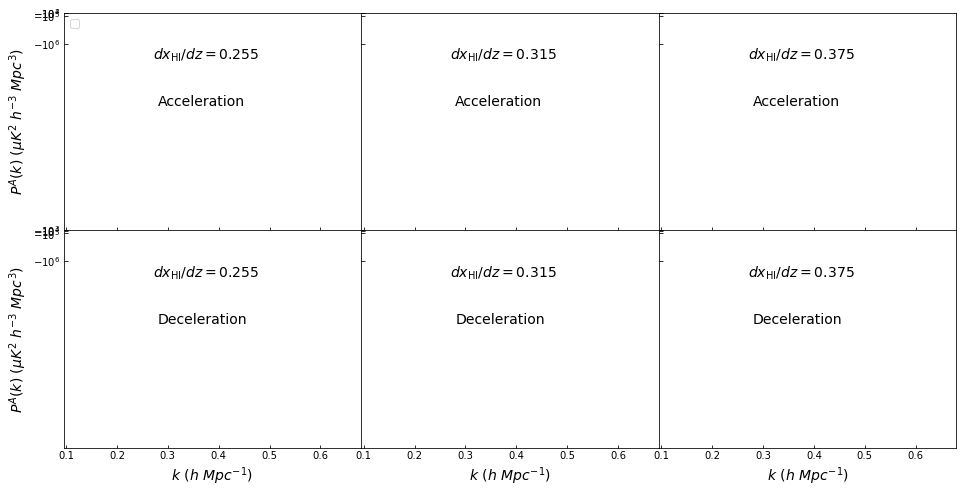

In [19]:
#plot the Pk_A_HICO comparison between different groups
COMPARISON_INDEX = [1, 3] # group number

colorlist=['#845EC2', '#FF6F91', '#FF9671', '#FFC75F']; lslist = ['-', '--', '-.']
dxHdz_plot_list = [0.255, 0.315, 0.375]
fig, axs = plt.subplots(2, 3, sharey=True, sharex = True, figsize=(16, 8))
fig.subplots_adjust(wspace=0, hspace = 0)
for i in range(3):
    dxHdz_plot = dxHdz_plot_list[i]
    for j in range(len(T_vir_array)):
        for k in range(len(T_vir_array[j])):
            if (k == COMPARISON_INDEX[0] or k == COMPARISON_INDEX[1]):
                for m in range(len(dxHdz_acc_array[j][k])):
                    if (dxHdz_acc_array[j][k][m] == dxHdz_plot):
                        axs[0, i].loglog(kh_array[1:], Pk_A_acc_map[j][k][m][1:], linewidth = 0.6, markersize = 2, marker = 'o', ls = lslist[j], color = colorlist[k])
                        if (j == 0):
                            axs[0, i].loglog(kh_array[1:], Pk_A_acc_map[j][k][m][1:], linewidth = 0.6, ls = lslist[j], color = colorlist[k], label=r'$dx_\mathrm{HI}/dz |_\mathrm{max}=%3.3g$'%max_dxHdz[k])
    axs[0, i].text(0.27, 1.5e6, '$dx_\mathrm{HI} / dz = %3.3g$'%dxHdz_plot, fontsize = 14)
    axs[0, i].text(0.28, 3e6, 'Acceleration', fontsize=14)
    #axs[i].loglog(np.linspace(0.1, 0.6, 100), PkA_simu_fit_plot, '-', color = 'black', linewidth = 1, label = '21cmFAST')
axs[0, 0].set_ylabel(r'$P^A(k)$ ($\mu K^2\ h^{-3}$ $Mpc^{3}$)', fontsize = 14)
axs[0, 0].set_ylabel(r'$P^A(k)$ ($\mu K^2\ h^{-3}$ $Mpc^{3}$)', fontsize = 14)
axs[0, 0].set_yticks([1e3, 1e4, 1e5, 1e6, 1e7])
axs[0, 0].set_yticklabels(['$-10^{3}$','$-10^{4}$','$-10^{5}$','$-10^{6}$','$-10^{7}$'])
axs[0, 0].set_ylim(5e2, 7e6)
axs[0, 0].legend(loc=2, fontsize=12)

for i in range(3):
    dxHdz_plot = dxHdz_plot_list[i]
    for j in range(len(T_vir_array)):
        for k in range(len(T_vir_array[j])):
            if (k == COMPARISON_INDEX[0] or k == COMPARISON_INDEX[1]):
                for m in range(len(dxHdz_dec_array[j][k])):
                    if (dxHdz_dec_array[j][k][m] == dxHdz_plot):
                        axs[1, i].loglog(kh_array[1:], Pk_A_dec_map[j][k][m][1:], markersize = 2, marker = 'o', linewidth = 0.6, ls = lslist[j], color = colorlist[k])
                        if (j == 0):
                            axs[1, i].loglog(kh_array[1:], Pk_A_dec_map[j][k][m][1:], linewidth = 0.6, ls = lslist[j], color = colorlist[k], label=r'$dx_\mathrm{HI}/dz |_\mathrm{max}=%3.3g$'%max_dxHdz[k])
    #axs[i].loglog(np.linspace(0.1, 0.6, 100), PkA_simu_fit_plot, '-', color = 'black', linewidth = 1, label = '21cmFAST')
    axs[1, i].set_xlabel(r'$k\ (h\ Mpc^{-1})$',fontsize = 14)
    axs[1, i].set_xticks([0.1,0.2,0.3,0.4,0.5,0.6])
    axs[1, i].set_xticklabels(['0.1','0.2','0.3','0.4','0.5','0.6'])
    axs[1, i].text(0.27, 1.5e6, '$dx_\mathrm{HI} / dz = %3.3g$'%dxHdz_plot, fontsize = 14)
    axs[1, i].text(0.28, 3e6, 'Deceleration', fontsize=14)
    axs[1, i].set_xlim(0.095, 0.68)
axs[1, 0].set_ylabel(r'$P^A(k)$ ($\mu K^2\ h^{-3}$ $Mpc^{3}$)', fontsize = 14)
axs[1, 0].set_ylabel(r'$P^A(k)$ ($\mu K^2\ h^{-3}$ $Mpc^{3}$)', fontsize = 14)
axs[1, 0].set_yticks([1e3, 1e4, 1e5, 1e6, 1e7])
axs[1, 0].set_yticklabels(['$-10^{3}$','$-10^{4}$','$-10^{5}$','$-10^{6}$','$-10^{7}$'])
axs[1, 0].set_ylim(5e2, 7e6)
axs[1, 0].invert_yaxis()
#axs[1, 0].legend(loc=3, fontsize=10)
fig.savefig('../figures/Pk_A_HICO_groupclass_compare%d%d_LEN%d.png'%(COMPARISON_INDEX[0], COMPARISON_INDEX[1], SMOOTHING_Pk), bbox_inches='tight', dpi=200)